In [1]:
import visualize
import gdxray
import transforms as T
import torchvision
import torch

In [2]:
import utils

In [3]:
dataset = gdxray.CroppedGdxrayDataset('cropped_castings_128_256')

In [4]:
dataset.load_boxes(['C0001', 'C0002'])

In [8]:
image, target = dataset[3]

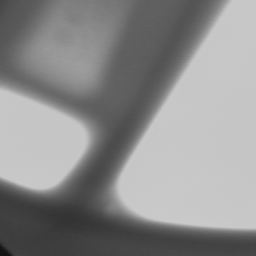

In [9]:
image

In [10]:
target['boxes']

tensor([[ 98., 201., 124., 226.]])

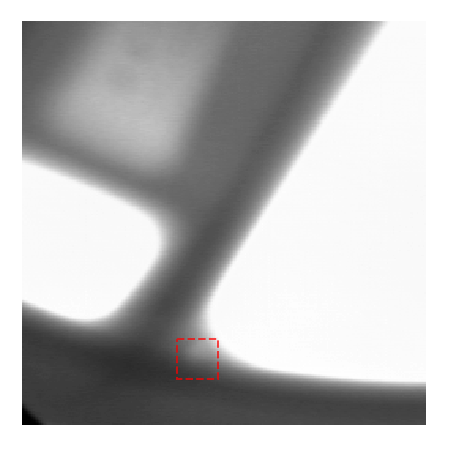

In [11]:
visualize.display_instances(image, target['boxes'], figsize=(8, 8))

In [12]:
def get_transform(train):
    transforms = []
    # converts the image, a PIL image, into a PyTorch Tensor
    transforms.append(T.ToTensor())
    if train:
        # during training, randomly flip the training images
        # and ground-truth for data augmentation
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [13]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [14]:
dataset = gdxray.CroppedGdxrayDataset('cropped_castings_128_256', get_transform(train=True))

In [15]:
dataset.load_boxes(['C0001', 'C0002'])

In [16]:
img, target = dataset[0]

In [17]:
img

tensor([[[0.0824, 0.0784, 0.0784,  ..., 0.3647, 0.3647, 0.3686],
         [0.0784, 0.0824, 0.0824,  ..., 0.3725, 0.3725, 0.3725],
         [0.0824, 0.0824, 0.0784,  ..., 0.3647, 0.3647, 0.3686],
         ...,
         [0.0588, 0.0627, 0.0588,  ..., 0.2745, 0.2706, 0.2667],
         [0.0627, 0.0627, 0.0627,  ..., 0.2627, 0.2667, 0.2667],
         [0.0627, 0.0588, 0.0549,  ..., 0.2667, 0.2667, 0.2706]]])

In [18]:
target

{'boxes': tensor([[171., 185., 198., 207.]]), 'labels': tensor([1])}

In [19]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True, collate_fn=utils.collate_fn
)

# For training

In [10]:
images,targets = next(iter(data_loader))

In [11]:
images

(tensor([[[0.7882, 0.7882, 0.7843,  ..., 0.2824, 0.2824, 0.2824],
          [0.7882, 0.7882, 0.7882,  ..., 0.2784, 0.2784, 0.2784],
          [0.7843, 0.7882, 0.7882,  ..., 0.2745, 0.2784, 0.2824],
          ...,
          [0.3765, 0.3725, 0.3765,  ..., 0.7686, 0.7686, 0.7686],
          [0.3804, 0.3765, 0.3765,  ..., 0.7725, 0.7725, 0.7725],
          [0.3765, 0.3765, 0.3765,  ..., 0.7686, 0.7686, 0.7725]]]),
 tensor([[[0.7725, 0.7725, 0.7725,  ..., 0.3765, 0.3765, 0.3725],
          [0.7725, 0.7725, 0.7686,  ..., 0.3765, 0.3765, 0.3725],
          [0.7725, 0.7725, 0.7725,  ..., 0.3843, 0.3843, 0.3804],
          ...,
          [0.0784, 0.0784, 0.0784,  ..., 0.2549, 0.2510, 0.2510],
          [0.0784, 0.0784, 0.0745,  ..., 0.2627, 0.2627, 0.2588],
          [0.0824, 0.0784, 0.0784,  ..., 0.2627, 0.2627, 0.2549]]]))

In [12]:
images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]

In [13]:
images

[tensor([[[0.7882, 0.7882, 0.7843,  ..., 0.2824, 0.2824, 0.2824],
          [0.7882, 0.7882, 0.7882,  ..., 0.2784, 0.2784, 0.2784],
          [0.7843, 0.7882, 0.7882,  ..., 0.2745, 0.2784, 0.2824],
          ...,
          [0.3765, 0.3725, 0.3765,  ..., 0.7686, 0.7686, 0.7686],
          [0.3804, 0.3765, 0.3765,  ..., 0.7725, 0.7725, 0.7725],
          [0.3765, 0.3765, 0.3765,  ..., 0.7686, 0.7686, 0.7725]]]),
 tensor([[[0.7725, 0.7725, 0.7725,  ..., 0.3765, 0.3765, 0.3725],
          [0.7725, 0.7725, 0.7686,  ..., 0.3765, 0.3765, 0.3725],
          [0.7725, 0.7725, 0.7725,  ..., 0.3843, 0.3843, 0.3804],
          ...,
          [0.0784, 0.0784, 0.0784,  ..., 0.2549, 0.2510, 0.2510],
          [0.0784, 0.0784, 0.0745,  ..., 0.2627, 0.2627, 0.2588],
          [0.0824, 0.0784, 0.0784,  ..., 0.2627, 0.2627, 0.2549]]])]

In [14]:
targets

[{'boxes': tensor([[163.,  52., 198.,  83.],
          [174.,  87., 193., 104.]]), 'labels': tensor([1, 1])},
 {'boxes': tensor([[208., 112., 224., 130.]]), 'labels': tensor([1])}]

In [15]:
output = model(images,targets)

/usr/local/anaconda3/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [16]:
output

{'loss_classifier': tensor(0.0647, grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.0038, grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.2317, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0.0044, grad_fn=<DivBackward0>)}

# For inference

In [17]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [18]:
prediction = model(images,targets)

In [19]:
prediction

[{'boxes': tensor([[1.2615e-01, 9.3340e+00, 7.5979e+01, 1.3700e+02],
          [8.2620e-01, 1.4191e+01, 7.4013e+01, 1.3962e+02],
          [7.7493e+01, 7.0147e-01, 1.8554e+02, 7.6644e+01],
          [7.2077e+01, 1.9660e+00, 1.8928e+02, 7.8750e+01],
          [7.6788e+01, 2.7181e+00, 1.8216e+02, 7.8351e+01]],
         grad_fn=<StackBackward0>),
  'labels': tensor([70, 74, 74, 77, 85]),
  'scores': tensor([0.4683, 0.3052, 0.1694, 0.0735, 0.0639], grad_fn=<IndexBackward0>)},
 {'boxes': tensor([[  3.6304,  37.7657, 243.4792, 224.3223],
          [  0.0000,   8.1691, 256.0000, 246.4250]], grad_fn=<StackBackward0>),
  'labels': tensor([17, 73]),
  'scores': tensor([0.1029, 0.0508], grad_fn=<IndexBackward0>)}]

In [21]:
targets

[{'boxes': tensor([[163.,  52., 198.,  83.],
          [174.,  87., 193., 104.]]), 'labels': tensor([1, 1])},
 {'boxes': tensor([[208., 112., 224., 130.]]), 'labels': tensor([1])}]

# Putting everything together

In [22]:
# use our dataset and defined transformations
dataset = gdxray.CroppedGdxrayDataset('cropped_castings_128_256', get_transform(train=True))
dataset_test = gdxray.CroppedGdxrayDataset('cropped_castings_128_256', get_transform(train=False))
dataset.load_boxes(['C0001', 'C0002'])
dataset_test.load_boxes(['C0001', 'C0002'])

In [23]:
# split the dataset in train and test set
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()
dataset = torch.utils.data.Subset(dataset, indices[:-50])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

In [28]:
# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False,
    collate_fn=utils.collate_fn)

# An Instance model for PennFudan Dataset

In [29]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [33]:
def get_instance_model(num_classes):
    # load an instance segmentation model pre-trained on COCO
    #model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

Now let's instantiate the model and the optimizer

In [34]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2

# get the model using our helper function
model = get_instance_model(num_classes)
# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

And now let's train the model

In [ ]:
from torch.optim.lr_scheduler import StepLR

In [40]:
num_epochs =2

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

Epoch: [0]  [  0/184]  eta: 1:06:25  lr: 0.000000  loss: 1.0729 (1.0729)  loss_classifier: 0.8047 (0.8047)  loss_box_reg: 0.0024 (0.0024)  loss_objectness: 0.2575 (0.2575)  loss_rpn_box_reg: 0.0083 (0.0083)  time: 21.6595  data: 0.0084
Epoch: [0]  [ 10/184]  eta: 1:06:59  lr: 0.000000  loss: 1.0969 (1.1392)  loss_classifier: 0.8066 (0.8060)  loss_box_reg: 0.0024 (0.0039)  loss_objectness: 0.2802 (0.3198)  loss_rpn_box_reg: 0.0073 (0.0095)  time: 23.1031  data: 0.0110
Epoch: [0]  [ 20/184]  eta: 0:59:47  lr: 0.000001  loss: 1.1411 (1.1582)  loss_classifier: 0.8065 (0.8024)  loss_box_reg: 0.0028 (0.0044)  loss_objectness: 0.3180 (0.3408)  loss_rpn_box_reg: 0.0067 (0.0106)  time: 21.8835  data: 0.0116
Epoch: [0]  [ 30/184]  eta: 0:54:49  lr: 0.000001  loss: 1.0890 (1.1326)  loss_classifier: 0.7822 (0.7924)  loss_box_reg: 0.0021 (0.0037)  loss_objectness: 0.2998 (0.3271)  loss_rpn_box_reg: 0.0054 (0.0094)  time: 20.4010  data: 0.0119


KeyboardInterrupt: 

In [39]:
import math

In [37]:
def train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq, scaler=None):
    model.train()
    metric_logger = utils.MetricLogger(delimiter="  ")
    metric_logger.add_meter("lr", utils.SmoothedValue(window_size=1, fmt="{value:.6f}"))
    header = f"Epoch: [{epoch}]"

    lr_scheduler = None
    if epoch == 0:
        warmup_factor = 1.0 / 1000
        warmup_iters = min(1000, len(data_loader) - 1)

        lr_scheduler = torch.optim.lr_scheduler.LinearLR(
            optimizer, start_factor=warmup_factor, total_iters=warmup_iters
        )

    for images, targets in metric_logger.log_every(data_loader, print_freq, header):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.cuda.amp.autocast(enabled=scaler is not None):
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())

        # reduce losses over all GPUs for logging purposes
        loss_dict_reduced = utils.reduce_dict(loss_dict)
        losses_reduced = sum(loss for loss in loss_dict_reduced.values())

        loss_value = losses_reduced.item()

        if not math.isfinite(loss_value):
            print(f"Loss is {loss_value}, stopping training")
            print(loss_dict_reduced)
            sys.exit(1)

        optimizer.zero_grad()
        if scaler is not None:
            scaler.scale(losses).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            losses.backward()
            optimizer.step()

        if lr_scheduler is not None:
            lr_scheduler.step()

        metric_logger.update(loss=losses_reduced, **loss_dict_reduced)
        metric_logger.update(lr=optimizer.param_groups[0]["lr"])

    return metric_logger